In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


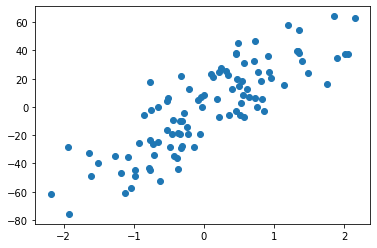

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)

[28.12597332] -2.271014426178382


In [5]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [6]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [7]:
class GDR:
    def __init__(self,epoch,learning_rate):
        self.b=-120
        self.epoch=epoch
        self.lr=learning_rate
        self.m=27.82809103
        
    def fit(self,X_train,y_train):
        
        for i in range(self.epoch):
            slope=-2*np.sum(y_train-self.m*X_train.ravel()-self.b)
            self.b=self.b-self.lr*slope
        return self.b
            
            
            

In [8]:
reg=GDR(55,0.001)
print(reg.fit(X,y))

-2.295295043085146


In [9]:
class GDR:
    def __init__(self,epoch,learning_rate):
        self.b=-120
        self.epoch=epoch
        self.lr=learning_rate
        self.m=100
        
    def fit(self,X_train,y_train):
        
        for i in range(self.epoch):
            loss_slope_b=-2 * np.sum(y_train-self.m * X_train.ravel()-self.b)
            loss_slope_m=-2 * np.sum((y_train-self.m * X_train.ravel()-self.b) * X_train.ravel())
            
            self.b=self.b- (self.lr * loss_slope_b)
            self.m=self.m- (self.lr * loss_slope_m )     
            
        return self.m,self.b
    
    def predict(self,X):
        return self.m*X+self.b

In [10]:
reg=GDR(70,0.001)
print(reg.fit(X_train,y_train))

(28.12742738603652, -2.272149769092331)


In [11]:
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

0.6345101396779722

In [12]:
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836] 151.88334520854633


In [14]:
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.4399387660024644


In [15]:
class BatchGDR:
    #Batch Gradient Descent
    
    def __init__(self,epoch,learning_rate):
        self.coef=None
        self.intercept=0
        self.epoch=epoch
        self.lr=learning_rate
    
    def fit(self,X,y):
        self.intercept=0
        self.coef=np.ones(X.shape[1])
        for i in range(self.epoch):
            y_hat=np.dot(X,self.coef)+self.intercept
            coef_slope= -2 * np.dot((y-y_hat),X)/X.shape[0]
            intercept_slope=-2*np.mean(y-y_hat)

            self.coef=self.coef-(self.lr * coef_slope)
            self.intercept=self.intercept-(self.lr * intercept_slope)
            
        return self.coef,self.intercept
    
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept
        
        
        

In [16]:
blr=BatchGDR(1000,0.5)
print(blr.fit(X_train,y_train))


(array([  14.38915082, -173.72674118,  491.54504015,  323.91983579,
        -39.32680194, -116.01099114, -194.04229501,  103.38216641,
        451.63385893,   97.57119174]), 152.0135263267291)


In [17]:
y_pred=blr.predict(X_test)
r2_score(y_test,y_pred)

0.4534524671450598

In [100]:
class SGDRegressor:
    #Stochastic Gradient Descent
    
    def __init__(self,epoch,learning_rate):
        self.coef=None
        self.intercept=0
        self.epoch=epoch
        self.lr=learning_rate
        self.t0=5
        self.t1=600
        
    def learning_schedule(self,t):
        return self.t0/(t+self.t1)
    
    def fit(self,X,y):
        self.intercept=0
        self.coef=np.ones(X.shape[1])
        for i in range(self.epoch):
            for j in range(X.shape[0]):
                self.lr=self.learning_schedule((i*X.shape[0])+j)
                index = np.random.randint(0,X.shape[0])
                y_hat=np.dot(X[index],self.coef)+self.intercept
                
                coef_slope= -2 * np.dot((y[index]-y_hat),X[index])
                intercept_slope=-2*(y[index]-y_hat)

                self.coef=self.coef-(self.lr * coef_slope)
                self.intercept=self.intercept-(self.lr * intercept_slope)
            
        return self.coef,self.intercept
    
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept

In [103]:
sgd=SGDRegressor(5000,0.01)
print(sgd.fit(X_train,y_train))


(array([ 44.36841989,   3.71244674, 141.66689928, 106.28829651,
        37.95592691,  25.81459035, -83.73757673,  82.30350295,
       133.962152  ,  77.70580858]), 151.4161900246852)


In [104]:
y_pred=sgd.predict(X_test)
r2_score(y_test,y_pred)

0.2899152452363326

In [106]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
sgd.fit(X_train,y_train)
print(sgd.coef_)

[  55.75856368  -65.80246932  347.79412557  245.67234766   18.19294219
  -27.36119431 -172.36191477  128.84498904  316.3867302   128.57567192]


/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [107]:
y_pred=sgd.predict(X_test)
r2_score(y_test,y_pred)

0.4325747860185708

In [117]:
import random

In [118]:
class MBGDR:
    #Mini-Batch Gradient Descent
    
    def __init__(self,batch_size,epoch,learning_rate):
        self.coef=None
        self.intercept=0
        self.batch_size=batch_size
        self.epoch=epoch
        self.lr=learning_rate
    
    def fit(self,X,y):
        self.intercept=0
        self.coef=np.ones(X.shape[1])
        for i in range(self.epoch):
            for j in range(int(X.shape[0]/self.batch_size)):
                idx=random.sample(range(X.shape[0]),self.batch_size)
                y_hat=np.dot(X[idx],self.coef)+self.intercept
                coef_slope= -2 * np.dot((y[idx]-y_hat),X[idx])/X.shape[0]
                intercept_slope=-2*np.mean(y[idx]-y_hat)

                self.coef=self.coef-(self.lr * coef_slope)
                self.intercept=self.intercept-(self.lr * intercept_slope)
            
        return self.coef,self.intercept
    
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept
        
        

In [131]:
mblr=MBGDR(int(X.shape[0]/10),1000,0.5)
print(mblr.fit(X_train,y_train))

(array([  14.72725043, -170.82962506,  493.62272989,  323.9337865 ,
        -39.19723466, -115.13968232, -194.16049593,  102.39224035,
        451.41205615,  100.07486825]), 161.63978276124178)


In [132]:
y_pred=mblr.predict(X_test)
r2_score(y_test,y_pred)

0.4381529362897688

In [141]:
#directly we do not have mini-batch gradient descent implemented in sklearn
sgd=SGDRegressor(learning_rate='constant',eta0=0.2)
batch_size=35
for i in range(100):
        idx=random.sample(range(X_train.shape[0]),batch_size)
        sgd.partial_fit(X_train[idx],y_train[idx])
sgd.coef_

array([   1.10326147,  -96.452838  ,  426.0044442 ,  312.25586591,
          2.02046926,  -64.83562141, -179.11903504,  124.90597771,
        392.46585922,   99.37457205])

In [142]:
y_pred=sgd.predict(X_test)
r2_score(y_test,y_pred)

0.33281694283632857